<center>
<h1>
<b>Name: Nader M. Elhadedy</b><br>
<b>Task: KMeans with unflat data</b>
</h1>
</center>


---

## Import Packages

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.cluster import KMeans, OPTICS
from sklearn.model_selection import GridSearchCV

## Create moons dataset

In [ ]:
noisy_moons = datasets.make_moons(n_samples=1500, noise=.05, random_state=1000)

In [ ]:
X, y = noisy_moons

In [ ]:
X.shape

(1500, 2)

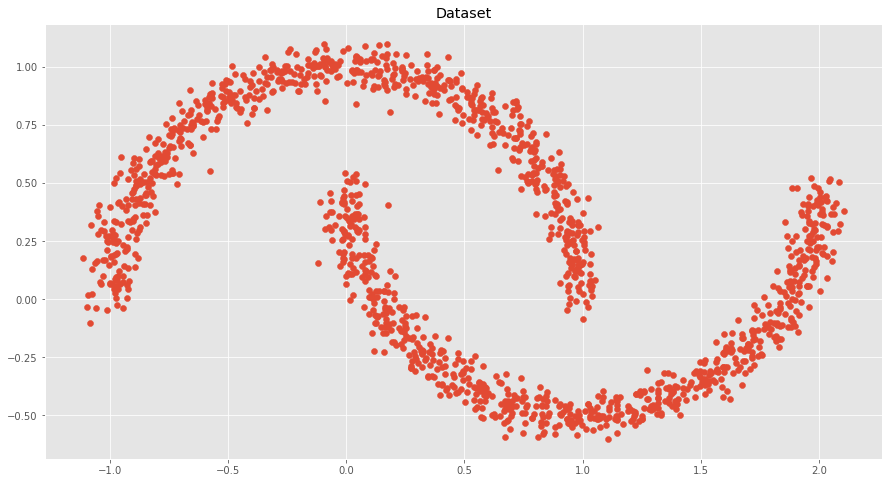

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.scatter(X[:,0], X[:,1])
plt.title('Dataset')
plt.show()

# **Using KMeans**

In [ ]:
model = KMeans(n_clusters=2, random_state=1000)

In [ ]:
model.fit(X)

y_pred = model.predict(X)

In [ ]:
model.n_iter_

4

## Visualizing Clustered Data

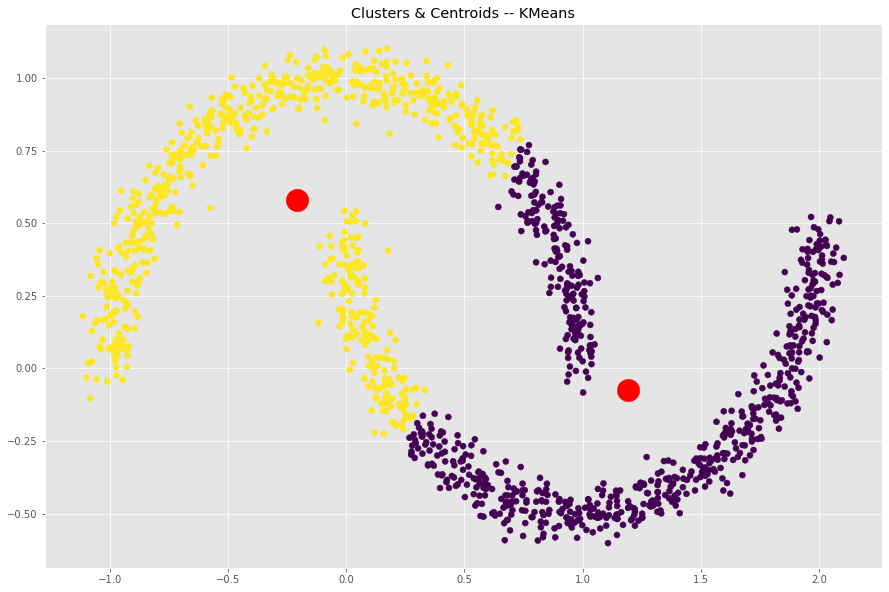

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

plt.scatter(X[:,0], X[:,1], c=model.labels_)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=500, c='red')
plt.title('Clusters & Centroids -- KMeans')
plt.show()

# **Evaluating Unsupervised algorithms**

## 1) `Adjusted Rand Score`

> Depends on ground truth labels

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

The adjusted Rand index is thus ensured to have a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical.

## 2) `Davies Bouldin Score`

> Depends on cluster labels

The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

## Evaluating KMeans

In [ ]:
adjusted_rand_score(y, y_pred)

0.2548647965125169

In [ ]:
davies_bouldin_score(X, y_pred)

0.777510463079578

*-----------------------------------------------------------------------------*
<br>**Extra:**

In [ ]:
silhouette_score(X, y_pred)

0.4924454952849083

In [ ]:
fowlkes_mallows_score(y, y_pred)

0.6272239519254491

---

# **Using KMeans after applying `kernel method`**


> ### Applying KernelPCA with rbf kernel, fitting data with KMeans and combining them in a pipeline

In [ ]:
pipe_line = make_pipeline((KernelPCA(n_components=4, kernel='rbf', random_state=1000)),
                (KMeans(n_clusters=2, random_state=1000)))

pipe_line.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'kernelpca', 'kmeans', 'kernelpca__alpha', 'kernelpca__coef0', 'kernelpca__copy_X', 'kernelpca__degree', 'kernelpca__eigen_solver', 'kernelpca__fit_inverse_transform', 'kernelpca__gamma', 'kernelpca__kernel', 'kernelpca__kernel_params', 'kernelpca__max_iter', 'kernelpca__n_components', 'kernelpca__n_jobs', 'kernelpca__random_state', 'kernelpca__remove_zero_eig', 'kernelpca__tol', 'kmeans__algorithm', 'kmeans__copy_x', 'kmeans__init', 'kmeans__max_iter', 'kmeans__n_clusters', 'kmeans__n_init', 'kmeans__n_jobs', 'kmeans__precompute_distances', 'kmeans__random_state', 'kmeans__tol', 'kmeans__verbose'])

In [ ]:
param_grid = {'kernelpca__gamma': list(np.linspace(3, 5, 20)), 'kernelpca__tol': list(np.linspace(1e-50, 1e-10, 4))}

## Using GridSearchCV to find best parameters

In [ ]:
final_model = GridSearchCV(pipe_line, param_grid=param_grid, scoring='adjusted_rand_score', cv=5)

In [ ]:
final_model.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kernelpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='rbf',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=4,
                                                  n_jobs=None,
                                                  random_state=1000,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('kmeans',
                                

In [ ]:
final_model.best_params_

{'kernelpca__gamma': 4.368421052631579, 'kernelpca__tol': 1e-50}

In [ ]:
y_pred = final_model.best_estimator_.fit_predict(X)

## Visualizing Clustered Data

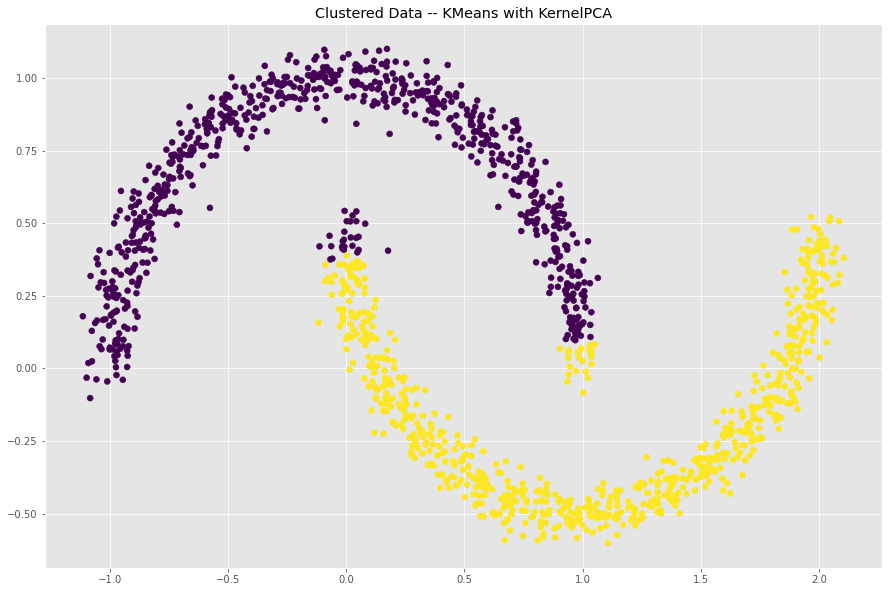

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title('Clustered Data -- KMeans with KernelPCA')
plt.show()

## Evaluating KMeans with KernelPCA

In [ ]:
adjusted_rand_score(y, y_pred)

0.8735174011432647

In [ ]:
davies_bouldin_score(X, y_pred)

1.038691467644407

*-----------------------------------------------------------------------------*
<br>**Extra:**

In [ ]:
silhouette_score(X, y_pred)

0.37317268424175115

In [ ]:
fowlkes_mallows_score(y, y_pred)

0.9367170178732583

---

# **Using OPTICS**

> OPTICS is an algorithm for finding density-based clusters in spatial data. Its basic idea is that the points of the database are linearly ordered such that spatially closest points become neighbors in the ordering. Additionally, a special distance is stored for each point that represents the density that must be accepted for a cluster so that both points belong to the same cluster.

In [ ]:
model = OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1)

In [ ]:
model.fit(X)

OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.1, min_samples=20, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [ ]:
y_pred = model.fit_predict(X)

## Visualizing Clustered Data

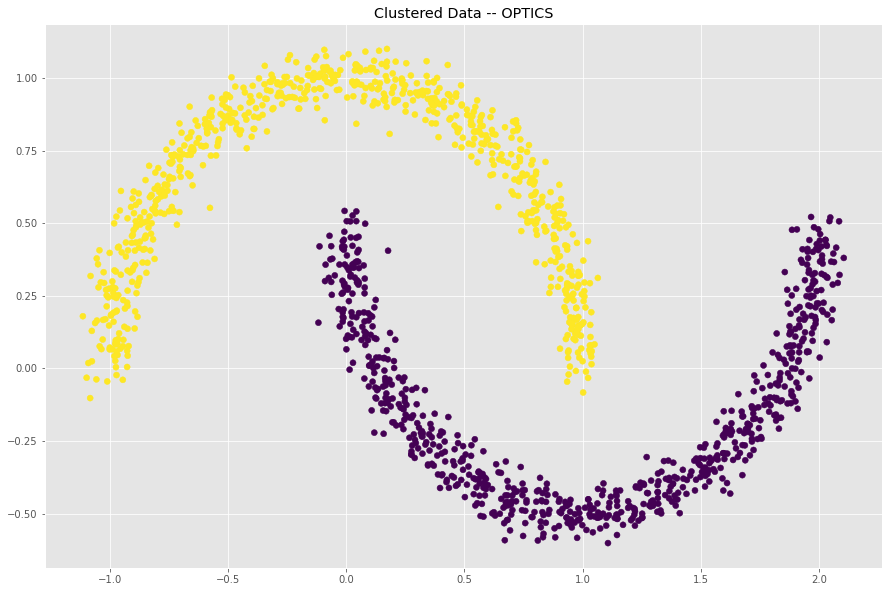

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))

plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title('Clustered Data -- OPTICS')
plt.show()

## Evaluating OPTICS

In [ ]:
adjusted_rand_score(y, y_pred)

1.0

In [ ]:
davies_bouldin_score(X, y_pred)

1.1488237363208116

*-----------------------------------------------------------------------------*
<br>**Extra:**

In [ ]:
silhouette_score(X, y_pred)

0.33617197805602805

In [ ]:
fowlkes_mallows_score(y, y_pred)

1.0